## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from datetime import datetime, timedelta


Bad key "text.kerning_factor" on line 4 in
/Users/kalz/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


**load the dataset**

In [2]:
#read the .mat dataset
file = scipy.io.loadmat('/Users/kalz/Desktop/imdb-wiki/wiki_crop/wiki.mat')

In [3]:
instances = file['wiki'][0][0][0].shape[1]

In [4]:
file["wiki"].dtype

dtype([('dob', 'O'), ('photo_taken', 'O'), ('full_path', 'O'), ('gender', 'O'), ('name', 'O'), ('face_location', 'O'), ('face_score', 'O'), ('second_face_score', 'O')])

In [5]:
cols = ["dob", "photo_taken", "full_path", "gender", "name", "face_location", "face_score", "second_face_score", "celeb_names"]

In [11]:
#create a dataframe
df = pd.DataFrame(index = range(0,instances), columns = cols)
df.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,celeb_names
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
file.keys()

dict_keys(['__header__', '__version__', '__globals__', 'wiki'])

In [13]:
#populate the dataframe
file_array = file['wiki'][0][0]
for i in range(len(file_array)):
    df[cols[i]] = pd.DataFrame(file_array[i][0])

In [14]:
#check top observations
df.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,celeb_names
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,[Sami Jauhojärvi],"[[111.29109473290997, 111.29109473290997, 252....",4.300962,NaN,NaN
1,703186,1964,[48/10000548_1925-04-04_1964.jpg],1.0,[Dettmar Cramer],"[[252.48330229530742, 126.68165114765371, 354....",2.645639,1.949248,NaN
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,[Marc Okrand],"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.329329,NaN,NaN
3,705061,1961,[65/10001965_1930-05-23_1961.jpg],1.0,[Aleksandar Matanović],"[[1, 1, 634, 440]]",-inf,NaN,NaN
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,[Diana Damrau],"[[171.61031405173117, 75.57451239763239, 266.7...",3.408442,NaN,NaN


### Data Cleaning

In [15]:
#check overall statistics
df.describe()

,dob,photo_taken,gender,face_score,second_face_score
count,62328.000000,62328.000000,59685.000000,6.232800e+04,4096.000000
mean,716681.030035,1998.765627,0.788523,-inf,2.009050
std,10832.627367,20.907937,0.408359,NaN,0.981277
min,4077.000000,1940.000000,0.000000,-inf,0.731419
25%,710673.000000,1992.750000,1.000000,-inf,1.164925
50%,719269.000000,2009.000000,1.000000,2.463949e+00,1.839065
75%,724702.250000,2012.000000,1.000000,3.760014e+00,2.655757
max,736011.000000,2015.000000,1.000000,7.081268e+00,5.463147


In [16]:
#check for data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62328 entries, 0 to 62327
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dob                62328 non-null  int32  
 1   photo_taken        62328 non-null  uint16 
 2   full_path          62328 non-null  object 
 3   gender             59685 non-null  float64
 4   name               62328 non-null  object 
 5   face_location      62328 non-null  object 
 6   face_score         62328 non-null  float64
 7   second_face_score  4096 non-null   float64
 8   celeb_names        0 non-null      object 
dtypes: float64(3), int32(1), object(4), uint16(1)
memory usage: 3.7+ MB


In [17]:
#missing values
nulls = df.isnull().sum()

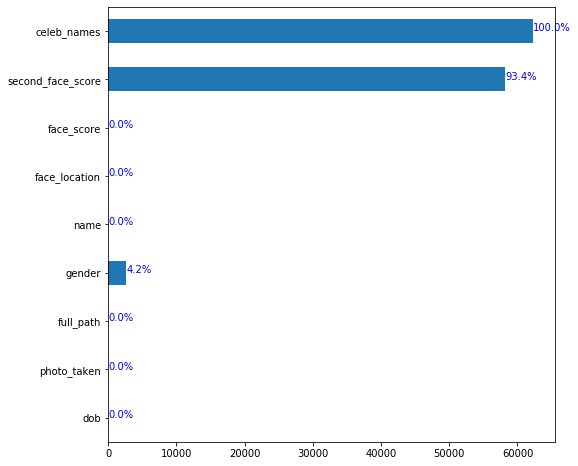

In [18]:
#plot missing values
nulls.plot(kind = 'barh', figsize = (8,8))
for x,y in enumerate(nulls):
    plt.annotate(str(round(((y/62328)*100), 1)) + '%',  xy = (y,x), color = 'b', size =10)

In [19]:
#Identify the dates with faulty values
sorted(df['dob'].values)

[4077,
 236447,
 303038,
 445703,
 498584,
 560729,
 566936,
 567300,
 569998,
 576543,
 577705,
 577809,
 580955,
 587424,
 590408,
 591675,
 593298,
 594768,
 597364,
 597382,
 600803,
 602672,
 603880,
 610734,
 611529,
 614415,
 619308,
 620823,
 624737,
 625461,
 632440,
 634548,
 635047,
 636219,
 636872,
 640167,
 640391,
 640520,
 641308,
 642345,
 642953,
 643779,
 644721,
 645315,
 645413,
 646632,
 649189,
 649600,
 649803,
 651072,
 653713,
 653753,
 653817,
 653943,
 653984,
 654100,
 654769,
 655076,
 655322,
 656149,
 656417,
 656989,
 656994,
 657049,
 657487,
 657722,
 658516,
 658697,
 658910,
 659291,
 659348,
 659729,
 660266,
 660359,
 660590,
 660609,
 661042,
 661180,
 661585,
 661827,
 661993,
 662075,
 662186,
 662951,
 662976,
 663104,
 663151,
 663962,
 664142,
 664306,
 664697,
 664856,
 665077,
 666171,
 666353,
 666466,
 666760,
 666774,
 666875,
 666887,
 667115,
 667256,
 667632,
 667814,
 668094,
 668123,
 668325,
 668533,
 668544,
 668709,
 668722,
 66

In [20]:
#set date as index
df.set_index("dob", inplace = True)
df.head()

,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,celeb_names
dob,,,,,,,,
723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,[Sami Jauhojärvi],"[[111.29109473290997, 111.29109473290997, 252....",4.300962,NaN,NaN
703186,1964,[48/10000548_1925-04-04_1964.jpg],1.0,[Dettmar Cramer],"[[252.48330229530742, 126.68165114765371, 354....",2.645639,1.949248,NaN
711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,[Marc Okrand],"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.329329,NaN,NaN
705061,1961,[65/10001965_1930-05-23_1961.jpg],1.0,[Aleksandar Matanović],"[[1, 1, 634, 440]]",-inf,NaN,NaN
720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,[Diana Damrau],"[[171.61031405173117, 75.57451239763239, 266.7...",3.408442,NaN,NaN


In [21]:
faulty_date = [4077]

In [22]:
df.shape

(62328, 8)

In [23]:
#drop the row with a faulty date
df.drop(faulty_date, inplace = True)


In [24]:
df.reset_index(level = 0, inplace = True)
df.head(2)

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,celeb_names
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,[Sami Jauhojärvi],"[[111.29109473290997, 111.29109473290997, 252....",4.300962,NaN,NaN
1,703186,1964,[48/10000548_1925-04-04_1964.jpg],1.0,[Dettmar Cramer],"[[252.48330229530742, 126.68165114765371, 354....",2.645639,1.949248,NaN


In [25]:
df.shape

(62327, 9)

In [26]:
#change dob column to datetime
from datetime import tetime, timedelta
def datenum_to_datetime(datenum):
    days = datenum % 1
    hours = days % 1 * 24
    minutes = hours % 1 * 60
    seconds = minutes % 1 * 60
    exact_date = datetime.fromordinal(int(datenum)) \
    + timedelta(days=int(days)) + timedelta(hours=int(hours)) \
    + timedelta(minutes=int(minutes)) + timedelta(seconds=round(seconds)) \
    - timedelta(days=366)
 
    return exact_date.year
 
df['date_of_birth'] = df['dob'].apply(datenum_to_datetime)


In [27]:
#calculate the age and add age column
df['age'] = df['photo_taken'] - df['date_of_birth']

In [28]:
#drop observations of pictures with no faces
df = df[df['face_score'] != -np.inf]
 
#drop observations of pictures with more than 1 face
df = df[df['second_face_score'].isna()]
 
#consider observations with 3 or more face score
df = df[df['face_score'] >= 3]
 
#drop observations without gender information
df = df[~df['gender'].isna()]

#drop observations with  age more than 100
df = df[df['age'] <= 100]

#drop observations with  age below 0
df = df[df['age'] > 0]

#drop unneccessary columns
df = df.drop(columns = ['name','face_score','second_face_score','date_of_birth','face_location', 'dob', 'photo_taken', 'celeb_names'])

In [29]:
df.head()

,full_path,gender,age
0,[17/10000217_1981-05-05_2009.jpg],1.0,28
2,[12/100012_1948-07-03_2008.jpg],1.0,60
4,[16/10002116_1971-05-31_2012.jpg],0.0,41
5,[02/10002702_1960-11-09_2012.jpg],0.0,52
6,[41/10003541_1937-09-27_1971.jpg],1.0,34


### Visualize the distribution of age and gender

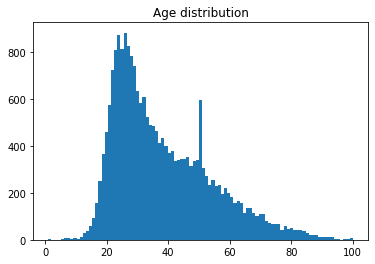

In [30]:
plt.hist(df['age'], bins=df['age'].nunique())
plt.title("Age distribution");

In [31]:
%store df

Stored 'df' (DataFrame)
